### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

### Load the dataset

In [2]:
data = pd.read_excel('genres_v2_1.xlsx')

In [3]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
data.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,Hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,Hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,Hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,Hardstyle,NaN,20998.0,Euphoric Hardstyle
42304,0.529,0.945,9,-5.862,1,0.0615,0.001890,0.000055,0.4140,0.134,...,6MAAMZImxcvYhRnxDLTufD,spotify:track:6MAAMZImxcvYhRnxDLTufD,https://api.spotify.com/v1/tracks/6MAAMZImxcvY...,https://api.spotify.com/v1/audio-analysis/6MAA...,162161,4,Hardstyle,NaN,20999.0,Best of Hardstyle 2020


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

### Drop irrelavent columns

In [6]:
data = data.drop(['song_name', 'Unnamed: 0', 'title', 'type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1)

In [7]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


### Exploratory Data Analysis

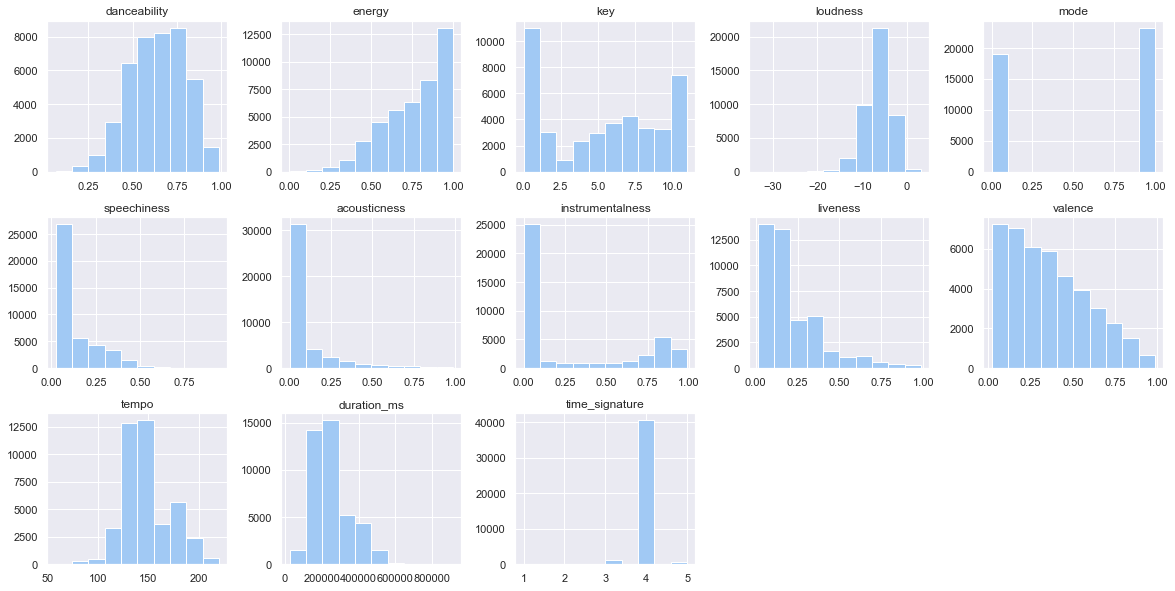

In [8]:
sns.set_theme(style='darkgrid', palette='pastel')
numeric = data._get_numeric_data()
hist = numeric.hist(layout=(3,5), figsize=(20,10))
plt.show()

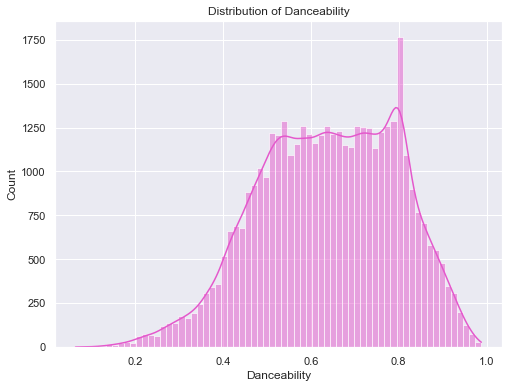

In [9]:
# Histogram - Danceability
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='danceability', kde=True, color = '#E458CC')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.show()

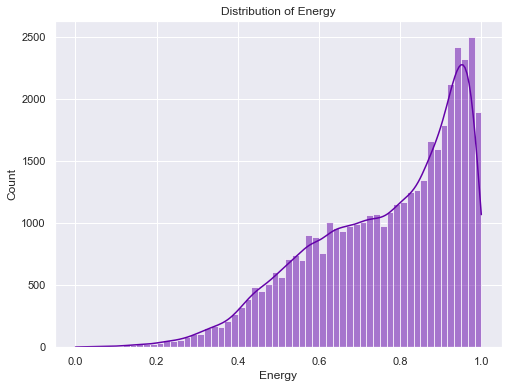

In [10]:
# Histogram - Energy
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='energy', kde=True, color = '#6402A9')
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

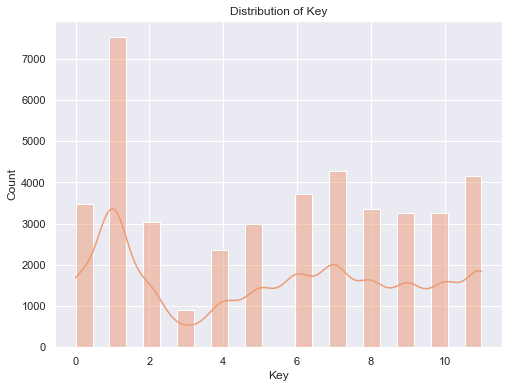

In [11]:
# Histogram - Key
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='key', kde=True, color = '#EC9C75')
plt.title('Distribution of Key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

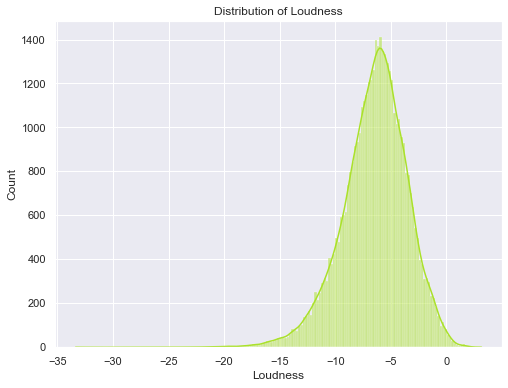

In [12]:
# Histogram - Loudness
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='loudness', kde=True, color = '#AAE12A')
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.show()

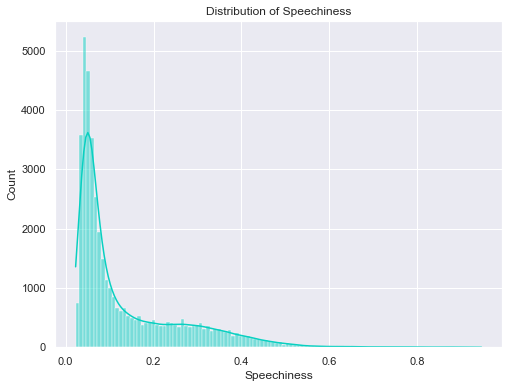

In [13]:
# Histogram - Speechiness
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='speechiness', kde=True, color = '#08D0C1')
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Count')
plt.show()

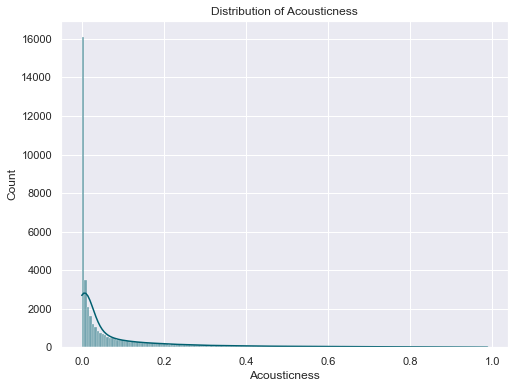

In [14]:
# Histogram - Acousticness
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='acousticness', kde=True, color = '#005F6F')
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.show()

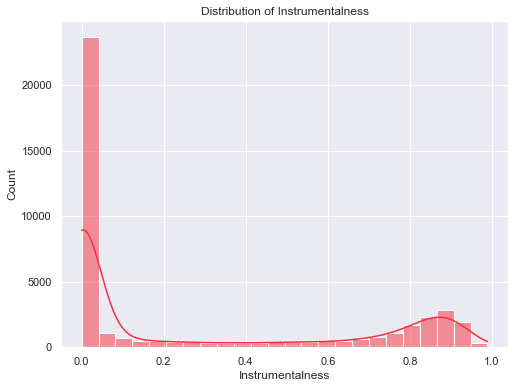

In [15]:
# Histogram - Instrumentalness
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='instrumentalness', color='#F72F3E', kde=True)
plt.title('Distribution of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Count')
plt.show()

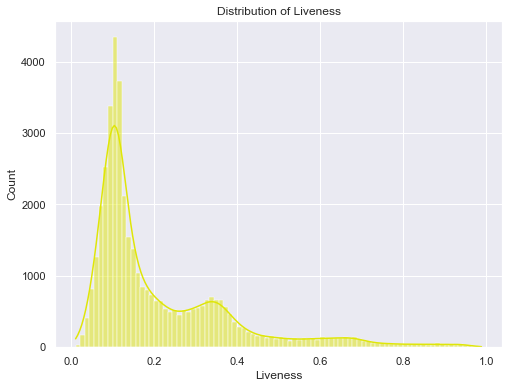

In [16]:
# Histogram - Liveness
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='liveness', color='#DFE607', kde=True)
plt.title('Distribution of Liveness')
plt.xlabel('Liveness')
plt.ylabel('Count')
plt.show()

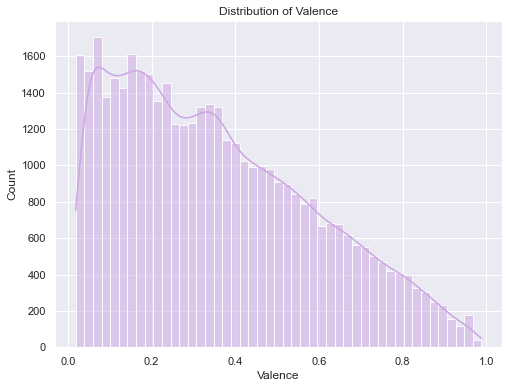

In [17]:
# Histogram - Valence
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='valence', color='#CDA5E2', kde=True)
plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Count')
plt.show()

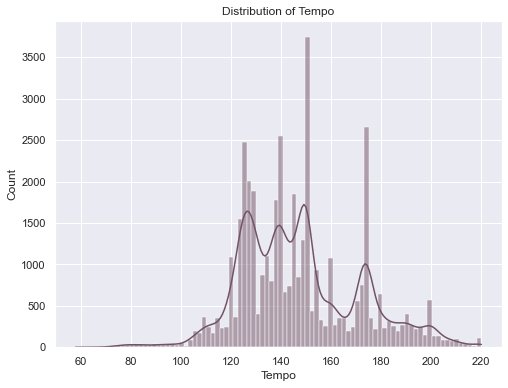

In [18]:
# Histogram - Tempo
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='tempo', color='#715266', kde=True)
plt.title('Distribution of Tempo')
plt.xlabel('Tempo')
plt.ylabel('Count')
plt.show()

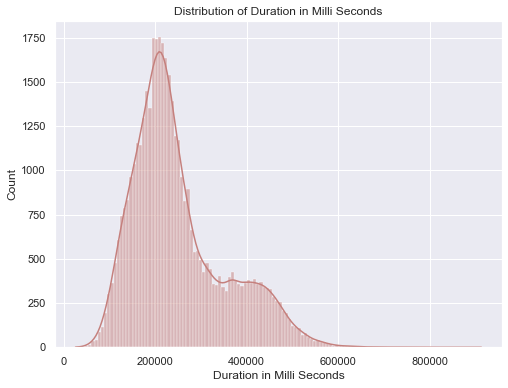

In [19]:
# Histogram - Duration in Milli Seconds
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='duration_ms', color='#C5807D', kde=True)
plt.title('Distribution of Duration in Milli Seconds')
plt.xlabel('Duration in Milli Seconds')
plt.ylabel('Count')
plt.show()

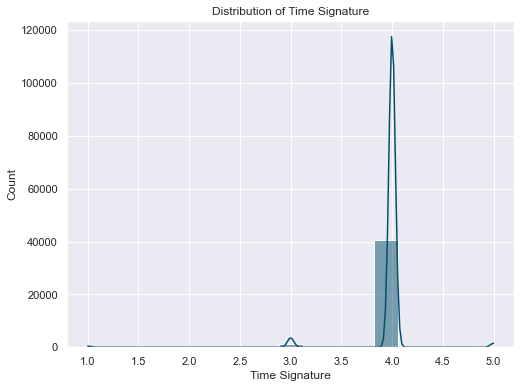

In [20]:
# Histogram - Time Signature
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='time_signature', color='#054F6C', kde=True)
plt.title('Distribution of Time Signature')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.show()

### Features of Each Genre

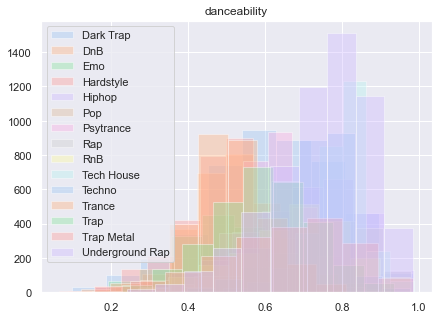

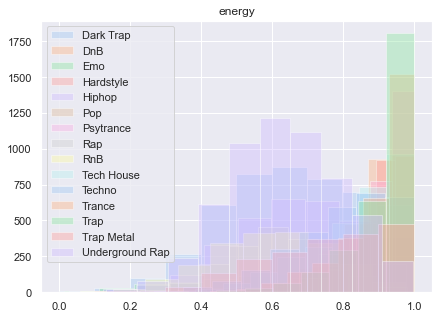

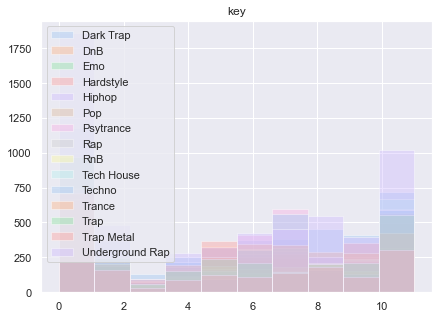

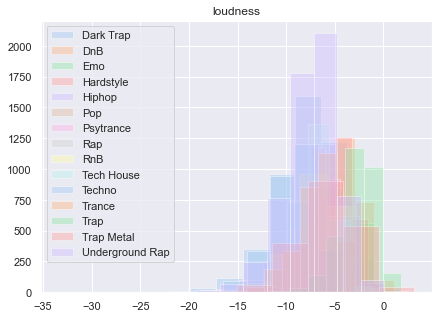

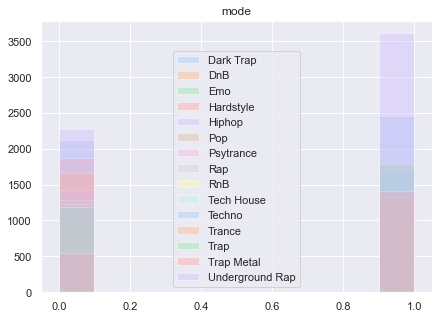

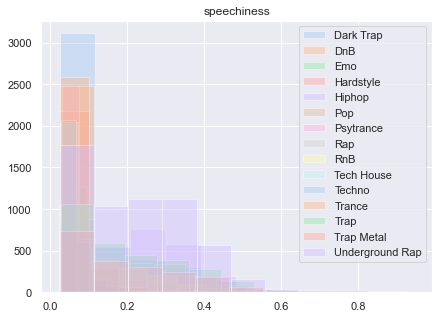

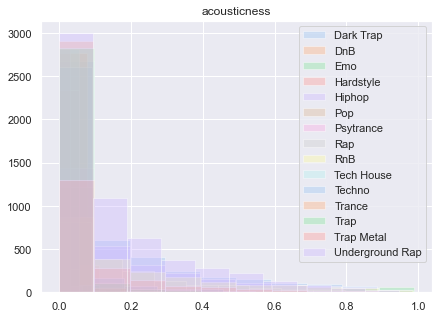

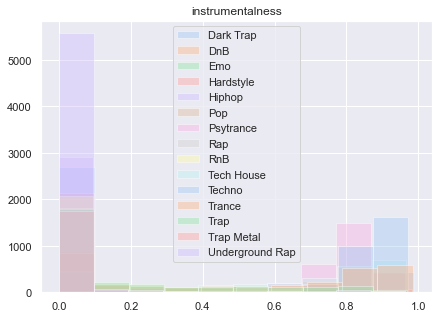

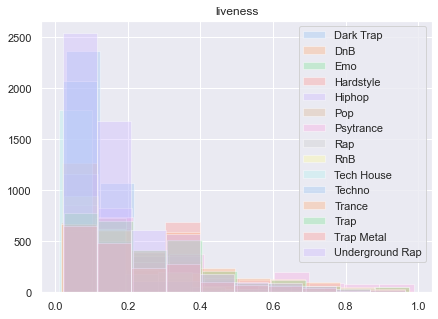

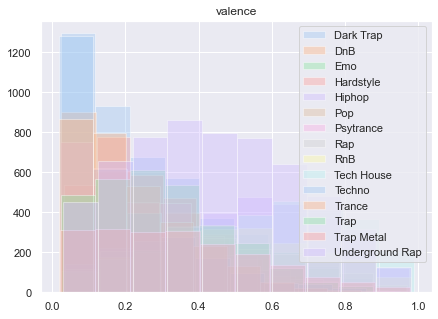

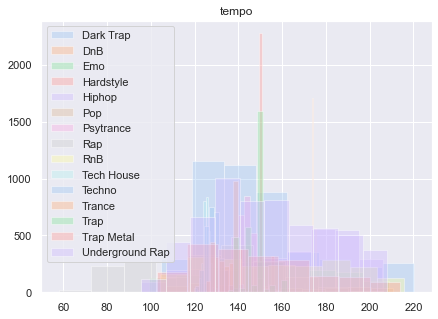

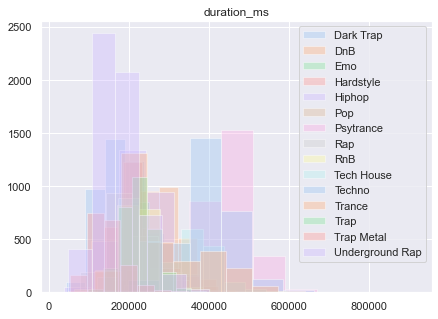

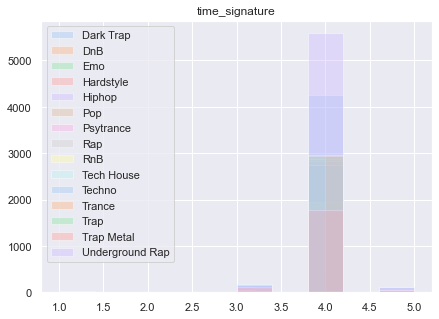

In [21]:
grouped_genre = data.groupby('genre')

for col in numeric.columns:
    fig, ax = plt.subplots()
    
    for i, d in grouped_genre:
        d[col].hist(alpha = 0.4, ax=ax, label=i, figsize=(7,5))
        ax.set_title(col)
        
    ax.legend()
    plt.show()

In [22]:
# Mean of different features in a Genre
grouped_genre.mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.618834,0.646851,5.298384,-7.998401,0.536479,0.123434,0.159493,0.277276,0.185081,0.273663,149.791186,187707.330275,3.961337
DnB,0.520944,0.873433,5.619016,-4.063237,0.446055,0.083478,0.019543,0.459998,0.202883,0.253062,173.849166,286548.825017,3.998314
Emo,0.493699,0.761175,5.052976,-5.433641,0.685714,0.080325,0.143094,0.011402,0.195243,0.444145,153.888640,218317.432143,3.938690
Hardstyle,0.478027,0.896238,5.710831,-4.349444,0.360695,0.094624,0.040841,0.137431,0.273830,0.267171,150.659340,229493.391349,3.964237
Hiphop,0.698982,0.654418,5.553170,-7.014983,0.527741,0.217150,0.195569,0.017154,0.210581,0.523628,162.980479,227954.272787,3.975561
Pop,0.676807,0.697638,5.399132,-5.632072,0.548807,0.088363,0.149251,0.013831,0.177949,0.550264,152.098937,211392.828633,3.984816
Psytrance,0.617462,0.902392,5.989531,-6.703383,0.598446,0.060425,0.006333,0.766458,0.293434,0.259625,142.688529,445575.322864,3.961499
Rap,0.742877,0.620083,5.048701,-6.887086,0.522186,0.217862,0.170566,0.006939,0.181320,0.440921,126.006374,203007.674784,3.985931
RnB,0.674206,0.598884,5.021915,-6.899896,0.532158,0.143110,0.225276,0.007400,0.178984,0.493974,157.533793,226402.473559,3.960934


In [23]:
# Standard Deviation of different features in a Genre
grouped_genre.std()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.161002,0.180810,3.638048,3.156933,0.498722,0.123217,0.214746,0.366365,0.144774,0.206191,27.201544,60377.140798,0.368688
DnB,0.106605,0.097925,3.589637,1.946063,0.497165,0.076611,0.051514,0.359274,0.167220,0.185296,1.141970,51728.231272,0.066194
Emo,0.126014,0.220404,3.477168,2.598227,0.464369,0.075109,0.260326,0.077927,0.145681,0.202451,27.545931,43426.023963,0.318840
Hardstyle,0.099230,0.082729,3.534666,1.589293,0.480284,0.090424,0.070447,0.253083,0.189537,0.157019,1.917755,58437.289366,0.232932
Hiphop,0.142183,0.162416,3.679533,2.827193,0.499312,0.131501,0.219940,0.093075,0.162457,0.222957,28.188804,60884.353006,0.329274
Pop,0.119175,0.155379,3.644698,1.947846,0.498153,0.081074,0.198390,0.085986,0.140379,0.215627,32.360009,35368.133282,0.250624
Psytrance,0.086189,0.093983,3.502445,1.585368,0.490295,0.027955,0.023667,0.140714,0.234006,0.181496,4.450475,68718.084176,0.197630
Rap,0.127670,0.137444,3.705862,2.353116,0.499643,0.134830,0.178520,0.058052,0.132247,0.215302,29.106285,59281.310692,0.284631
RnB,0.140207,0.164788,3.638515,2.518220,0.499084,0.112993,0.231904,0.060419,0.133160,0.221235,29.820987,50866.054759,0.361912


In [24]:
# Minimum values of different features in a Genre
grouped_genre.min()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.0979,0.000243,0,-25.222,0,0.0242,0.000001,0.000000,0.0307,0.0235,75.418,42133,1
DnB,0.1380,0.349000,0,-17.088,0,0.0265,0.000003,0.000000,0.0189,0.0253,169.857,35862,1
Emo,0.1110,0.014800,0,-32.929,0,0.0232,0.000001,0.000000,0.0210,0.0358,87.018,50720,1
Hardstyle,0.0891,0.464000,0,-16.475,0,0.0253,0.000008,0.000000,0.0153,0.0318,143.803,91617,1
Hiphop,0.1970,0.027900,0,-24.694,0,0.0227,0.000017,0.000000,0.0219,0.0352,95.622,38333,1
Pop,0.2090,0.173000,0,-16.423,0,0.0232,0.000068,0.000000,0.0215,0.0383,106.960,121143,1
Psytrance,0.2900,0.388000,0,-16.694,0,0.0300,0.000002,0.000924,0.0228,0.0228,128.008,108000,3
Rap,0.2410,0.144000,0,-19.720,0,0.0271,0.000151,0.000000,0.0221,0.0362,57.967,77500,1
RnB,0.1910,0.060900,0,-29.478,0,0.0239,0.000081,0.000000,0.0235,0.0338,91.560,62213,1


In [25]:
# Maximum values of different features in a Genre
grouped_genre.max()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.985,0.998,11,1.646,1,0.946,0.984,0.989,0.958,0.968,220.290,534857,5
DnB,0.855,0.999,11,3.108,1,0.906,0.783,0.968,0.981,0.970,177.100,514629,5
Emo,0.926,0.995,11,-0.946,1,0.729,0.988,0.952,0.943,0.971,208.951,548253,5
Hardstyle,0.774,0.999,11,0.101,1,0.774,0.562,0.983,0.976,0.935,157.687,566495,5
Hiphop,0.988,0.978,11,-0.067,1,0.944,0.982,0.947,0.973,0.975,206.247,723573,5
Pop,0.935,0.977,11,-2.058,1,0.463,0.948,0.947,0.790,0.966,210.796,484147,5
Psytrance,0.925,0.999,11,-1.464,1,0.473,0.321,0.964,0.988,0.917,157.033,913052,5
Rap,0.981,0.980,11,-1.181,1,0.833,0.883,0.951,0.892,0.970,205.895,728413,5
RnB,0.978,0.974,11,0.175,1,0.786,0.986,0.939,0.965,0.979,215.669,602297,5


In [26]:
# Songs count for all the Genres
genre = data['genre']
genre_count = {}
for gen in np.unique(genre):
    genre_count[gen] = len(data[data['genre'] == gen])
genre_count

{'Dark Trap': 4578,
 'DnB': 2966,
 'Emo': 1680,
 'Hardstyle': 2936,
 'Hiphop': 3028,
 'Pop': 461,
 'Psytrance': 2961,
 'Rap': 1848,
 'RnB': 2099,
 'Tech House': 2975,
 'Techno': 2956,
 'Trance': 2999,
 'Trap': 2987,
 'Trap Metal': 1956,
 'Underground Rap': 5875}

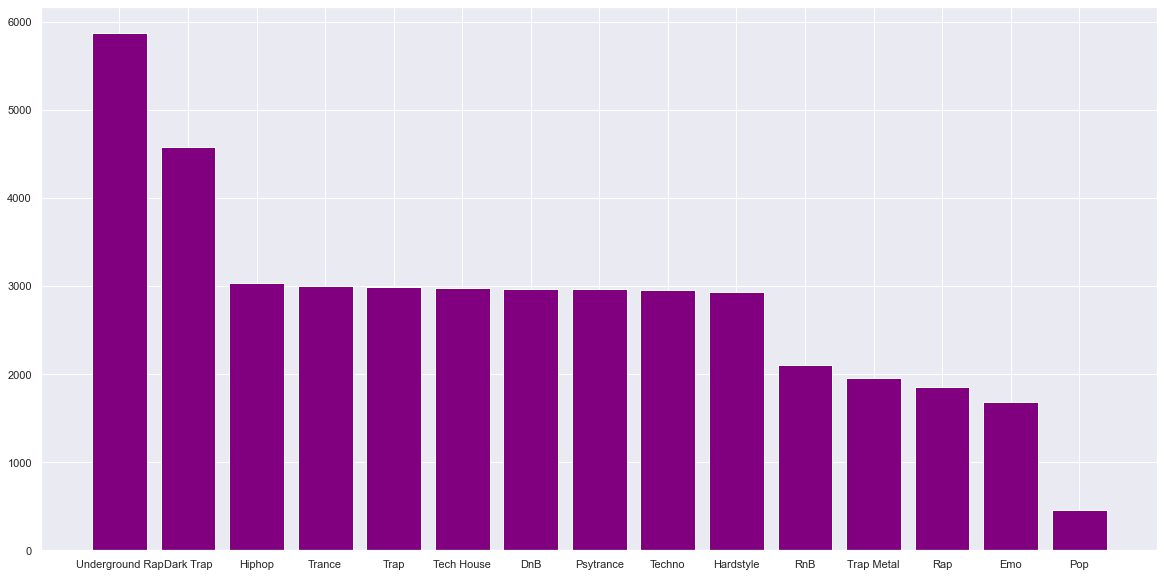

In [27]:
fig = plt.figure(figsize=(20,10))
plt.bar(height=data['genre'].value_counts().values, x=data['genre'].value_counts().index, color = 'purple')
plt.show()

### Check for missing values

In [28]:
data.isnull().any()

danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
genre               False
dtype: bool

In [29]:
data['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'Tech House', 'Techno', 'Trance', 'Psytrance',
       'Trap', 'DnB', 'Hardstyle'], dtype=object)

### Correlation Analysis

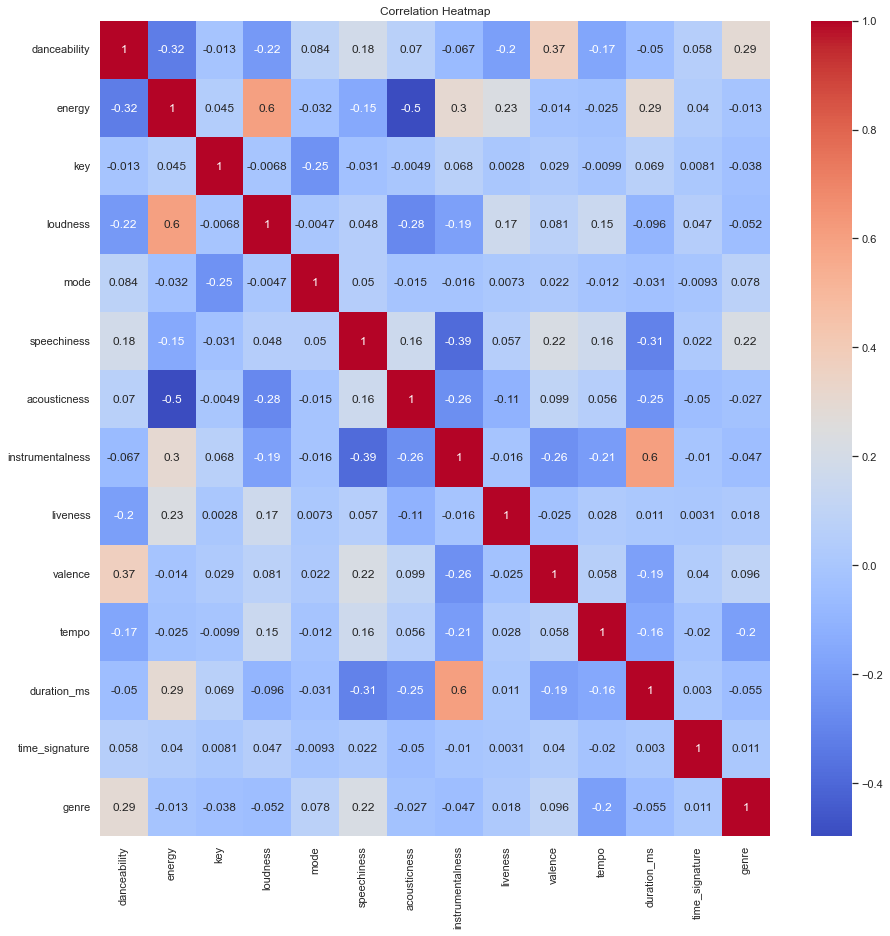

In [30]:
le = LabelEncoder().fit(data['genre'])
data['genre'] = le.transform(data['genre'])
corr = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Dropping highly correlated columns

In [31]:
features = data.drop(['key','mode','time_signature','genre'],axis=1)
labels = data['genre']
features.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539
1,0.719,0.493,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427
2,0.850,0.893,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821
3,0.476,0.781,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661
4,0.798,0.624,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298


### Feature Scaling

In [32]:
sc = StandardScaler()
features = sc.fit_transform(features)
pickle.dump(sc, open('scalar.plk', 'wb'))

### Oversampling

In [33]:
oversample = SMOTE()
features, labels = oversample.fit_resample(features, labels)

### Spliting into train and test data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)

In [35]:
features.shape

(88125, 10)

In [36]:
X_train.shape

(70500, 10)

### Building Bagging Classifier

In [37]:
model = BaggingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [38]:
n_scores

array([0.76567376, 0.77262411, 0.7706383 , 0.7741844 , 0.76609929,
       0.76907801, 0.76609929, 0.77432624, 0.7741844 , 0.76822695,
       0.76822695, 0.77120567, 0.75900709, 0.77092199, 0.76780142,
       0.77390071, 0.76822695, 0.76638298, 0.7648227 , 0.77787234,
       0.7658156 , 0.7729078 , 0.76737589, 0.77617021, 0.76439716,
       0.76964539, 0.76312057, 0.76950355, 0.76439716, 0.7706383 ])

In [39]:
n_scores.mean()

0.7691158392434989

In [40]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([ 5,  6,  7, ..., 10, 11, 14])

In [41]:
le.inverse_transform(pred)

array(['Pop', 'Psytrance', 'Rap', ..., 'Techno', 'Trance',
       'Underground Rap'], dtype=object)

### Evaluating the model and saving the model

In [42]:
accuracy_score(y_test, pred)

0.7810496453900709

In [43]:
f1_score(y_test, pred, average='weighted')

0.7776704476264057

In [44]:
pickle.dump(model, open('model.plk', 'wb'))